<a href="https://colab.research.google.com/github/jordan24cyber/project-yohathor/blob/main/Decision_Tree_Thoriq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. IMPORT LIBRARIES**

In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [61]:
import warnings

warnings.filterwarnings('ignore')

**2. IMPORT DATASET**

In [62]:
data = 'earthquake_alert_balanced_dataset.csv'

df = pd.read_csv(data, header=None)

**3. EXPLORATORY DATA ANALYSIS**

In [63]:
# view dimensions of dataset

df.shape

(1301, 6)

In [64]:
# preview the dataset

df.head()

,0,1,2,3,4,5
0,magnitude,depth,cdi,mmi,sig,alert
1,7.00,14.00,8.00,7.00,0.00,green
2,6.90,25.00,4.00,4.00,-33.00,green
3,7.00,579.00,3.00,3.00,-13.00,green
4,7.30,37.00,5.00,5.00,65.00,green


Rename column names

In [65]:
col_names = ['Magnitude', 'Depth', 'CDI', 'MMI', 'Signal', 'Alert']


df.columns = col_names

col_names


['Magnitude', 'Depth', 'CDI', 'MMI', 'Signal', 'Alert']

View summary of dataset

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Magnitude  1301 non-null   object
 1   Depth      1301 non-null   object
 2   CDI        1301 non-null   object
 3   MMI        1301 non-null   object
 4   Signal     1301 non-null   object
 5   Alert      1301 non-null   object
dtypes: object(6)
memory usage: 61.1+ KB


Frequency distribution of values in variables

In [67]:
col_names = ['Magnitude', 'Depth', 'CDI', 'MMI', 'Signal', 'Alert']


for col in col_names:

    print(df[col].value_counts())

Magnitude
6.50    103
6.60     83
6.90     70
6.70     53
6.80     48
       ... 
6.52      1
7.37      1
8.45      1
8.23      1
8.33      1
Name: count, Length: 168, dtype: int64
Depth
10.00     120
9.00       75
12.00      71
11.00      61
13.00      53
         ... 
117.00      1
83.00       1
141.00      1
61.00       1
129.00      1
Name: count, Length: 174, dtype: int64
CDI
8.00    536
9.00    244
7.00    189
6.00    103
5.00     76
0.00     62
4.00     34
3.00     30
1.00     14
2.00     12
cdi       1
Name: count, dtype: int64
MMI
8.00    474
7.00    435
6.00    166
5.00     68
4.00     65
9.00     53
3.00     34
2.00      4
mmi       1
1.00      1
Name: count, dtype: int64
Signal
93.00      25
26.00      23
-118.00    22
-98.00     18
-115.00    18
           ..
-125.00     1
115.00      1
49.00       1
-102.00     1
37.00       1
Name: count, Length: 239, dtype: int64
Alert
green     325
orange    325
yellow    325
red       325
alert       1
Name: count, dtype: int64


Summary of variables

There are 7 variables in the dataset. All the variables are of categorical data type.

These are given by Magnitude, Depth, CDI, MMI, Signal, Alert.

**Alert** is the target variable.

Explore class variable

In [68]:
df['Alert'].value_counts()

,count
Alert,
green,325
orange,325
yellow,325
red,325
alert,1


Missing values in variables

In [69]:
# check missing values in variables

df.isnull().sum()

,0
Magnitude,0
Depth,0
CDI,0
MMI,0
Signal,0
Alert,0


**4. DECLARE FEATURE VECTOR AND TARGET VARIABEL**

In [70]:
X = df.drop(['Alert'], axis=1)

y = df['Alert']

**5. SPLIT DATA INTO SEPERATE TRAINING AND TEST SET**

In [71]:
# split x and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [72]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((871, 5), (430, 5))

**6. FEATURE ENGINEERING**

In [73]:
# check data types in X_train

X_train.dtypes

,0
Magnitude,object
Depth,object
CDI,object
MMI,object
Signal,object


Encode categorical variables

In [74]:
X_train.head()

,Magnitude,Depth,CDI,MMI,Signal
834,7.17,9.00,9.00,9.00,83.00
1073,7.49,145.00,7.00,6.00,119.00
5,6.60,624.00,0.00,2.00,-98.00
100,6.50,10.00,7.00,6.00,-90.00
424,6.97,41.00,8.00,7.00,59.00


In [75]:
# import category encoders

import category_encoders as ce

In [76]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Magnitude', 'Depth', 'CDI', 'MMI', 'Signal'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [77]:
X_train.head()

,Magnitude,Depth,CDI,MMI,Signal
834,1,1,1,1,1
1073,2,2,2,2,2
5,3,3,3,3,3
100,4,4,2,2,4
424,5,5,4,4,5


In [78]:
X_test.head()

,Magnitude,Depth,CDI,MMI,Signal
478,133.0,7.0,4,5.0,14.0
722,83.0,4.0,4,5.0,28.0
312,3.0,26.0,2,2.0,214.0
661,-1.0,122.0,4,5.0,18.0
969,116.0,14.0,4,5.0,184.0


**7. DECISION TREE CLASSIFIER WITH CRITERION GINI INDEX**

In [79]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [80]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [81]:
y_pred_gini = clf_gini.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.5884


Compare the train-set and test-set accuracy

In [83]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['red', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'yellow',
       'red', 'yellow', 'yellow', 'red', 'red', 'yellow', 'red', 'yellow',
       'yellow', 'red', 'red', 'yellow', 'green', 'red', 'green',
       'yellow', 'yellow', 'yellow', 'yellow', 'red', 'yellow', 'red',
       'red', 'yellow', 'red', 'red', 'yellow', 'yellow', 'red', 'red',
       'red', 'yellow', 'red', 'red', 'yellow', 'yellow', 'yellow',
       'green', 'green', 'yellow', 'orange', 'green', 'green', 'green',
       'green', 'yellow', 'yellow', 'red', 'red', 'red', 'green',
       'yellow', 'yellow', 'yellow', 'red', 'yellow', 'orange', 'red',
       'yellow', 'red', 'red', 'red', 'red', 'green', 'red', 'yellow',
       'yellow', 'yellow', 'yellow', 'green', 'yellow', 'green', 'yellow',
       'yellow', 'red', 'yellow', 'orange', 'yellow', 'green', 'red',
       'red', 'yellow', 'yellow', 'red', 'red', 'red', 'red', 'yellow',
       'yellow', 'red', 'yellow', 'yellow', 'green', 'yellow', 'yellow',
       

In [84]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.6062


Check for overfitting and underfitting

In [85]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.6062
Test set score: 0.5884


Visualize decision-trees

[Text(0.5909090909090909, 0.875, 'x[3] <= 5.5\ngini = 0.75\nsamples = 871\nvalue = [1.0, 210.0, 220.0, 227.0, 213.0]'),
 Text(0.36363636363636365, 0.625, 'x[3] <= 4.5\ngini = 0.729\nsamples = 754\nvalue = [0, 94, 220, 227, 213]'),
 Text(0.4772727272727273, 0.75, 'True  '),
 Text(0.18181818181818182, 0.375, 'x[3] <= 1.5\ngini = 0.702\nsamples = 430\nvalue = [0, 91, 111, 49, 179]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.41\nsamples = 38\nvalue = [0, 0, 8, 28, 2]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.67\nsamples = 392\nvalue = [0, 91, 103, 21, 177]'),
 Text(0.5454545454545454, 0.375, 'x[1] <= 27.0\ngini = 0.574\nsamples = 324\nvalue = [0, 3, 109, 178, 34]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.504\nsamples = 270\nvalue = [0, 0, 76, 173, 21]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.557\nsamples = 54\nvalue = [0, 3, 33, 5, 13]'),
 Text(0.8181818181818182, 0.625, 'x[2] <= 10.5\ngini = 0.017\nsamples = 117\nvalue = [1, 116, 0, 0, 0]'),
 Text(0.7045454545454546, 0.75

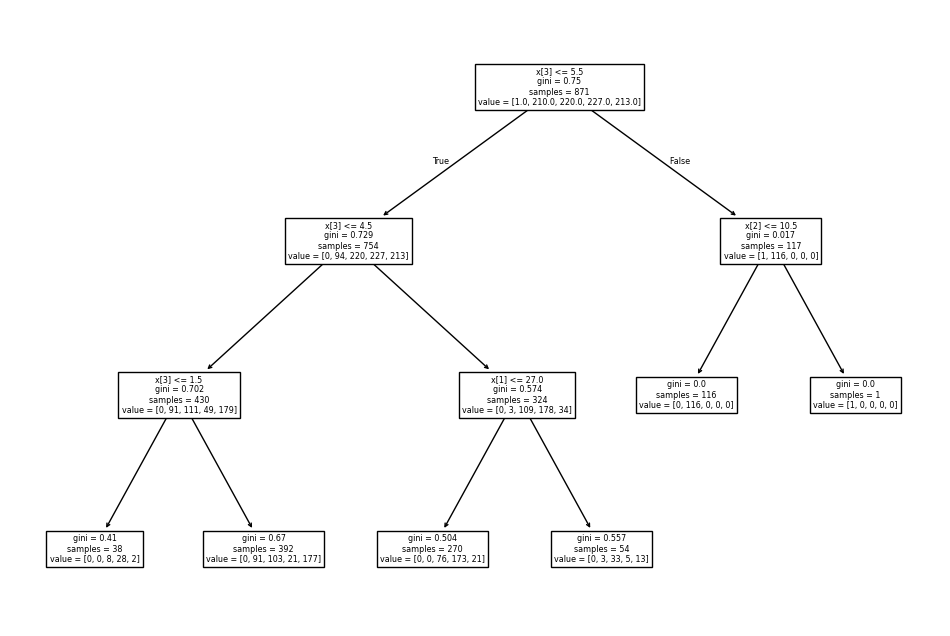

In [86]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

Visualize decision-trees with graphviz

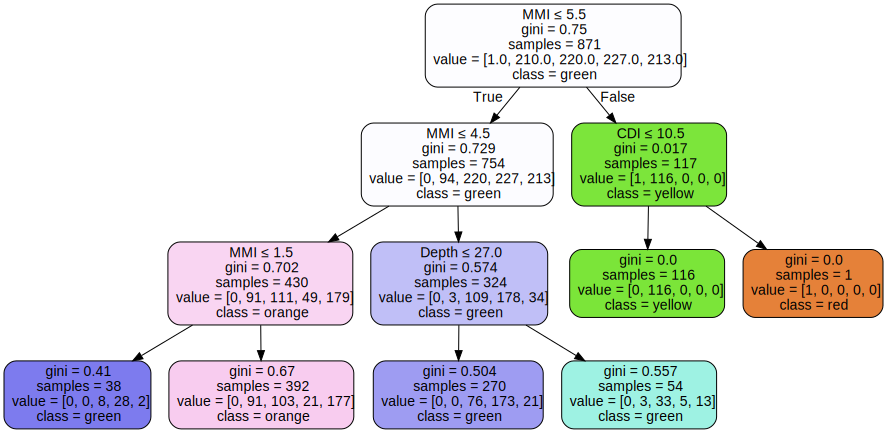

In [87]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

**7. DECSION TREE CLASSIFIERWITH CRITERION ENTROPY**

In [88]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Predict the Test set results with criterion entropy

In [89]:
y_pred_en = clf_en.predict(X_test)

Check accuracy score with criterion entropy

In [90]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.5884


Compare the train-set and test-set accuracy

In [91]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['red', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'yellow',
       'red', 'yellow', 'yellow', 'red', 'red', 'yellow', 'red', 'yellow',
       'yellow', 'red', 'red', 'yellow', 'green', 'red', 'green',
       'yellow', 'yellow', 'yellow', 'yellow', 'red', 'yellow', 'red',
       'red', 'yellow', 'red', 'red', 'yellow', 'yellow', 'red', 'red',
       'red', 'yellow', 'red', 'red', 'yellow', 'yellow', 'yellow',
       'green', 'green', 'yellow', 'orange', 'green', 'green', 'green',
       'green', 'yellow', 'yellow', 'red', 'red', 'red', 'green',
       'yellow', 'yellow', 'yellow', 'red', 'yellow', 'orange', 'red',
       'yellow', 'red', 'red', 'red', 'red', 'green', 'red', 'yellow',
       'yellow', 'yellow', 'yellow', 'green', 'yellow', 'green', 'yellow',
       'yellow', 'red', 'yellow', 'orange', 'yellow', 'green', 'red',
       'red', 'yellow', 'yellow', 'red', 'red', 'red', 'red', 'yellow',
       'yellow', 'red', 'yellow', 'yellow', 'green', 'yellow', 'yellow',
       

In [92]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.6062


Check for overfitting and underfitting

In [93]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.6062
Test set score: 0.5884


Visualize decision-trees

[Text(0.5909090909090909, 0.875, 'x[3] <= 5.5\nentropy = 2.01\nsamples = 871\nvalue = [1.0, 210.0, 220.0, 227.0, 213.0]'),
 Text(0.36363636363636365, 0.625, 'x[3] <= 4.5\nentropy = 1.93\nsamples = 754\nvalue = [0, 94, 220, 227, 213]'),
 Text(0.4772727272727273, 0.75, 'True  '),
 Text(0.18181818181818182, 0.375, 'x[3] <= 1.5\nentropy = 1.862\nsamples = 430\nvalue = [0, 91, 111, 49, 179]'),
 Text(0.09090909090909091, 0.125, 'entropy = 1.021\nsamples = 38\nvalue = [0, 0, 8, 28, 2]'),
 Text(0.2727272727272727, 0.125, 'entropy = 1.74\nsamples = 392\nvalue = [0, 91, 103, 21, 177]'),
 Text(0.5454545454545454, 0.375, 'x[1] <= 27.0\nentropy = 1.407\nsamples = 324\nvalue = [0, 3, 109, 178, 34]'),
 Text(0.45454545454545453, 0.125, 'entropy = 1.213\nsamples = 270\nvalue = [0, 0, 76, 173, 21]'),
 Text(0.6363636363636364, 0.125, 'entropy = 1.478\nsamples = 54\nvalue = [0, 3, 33, 5, 13]'),
 Text(0.8181818181818182, 0.625, 'x[2] <= 10.5\nentropy = 0.071\nsamples = 117\nvalue = [1, 116, 0, 0, 0]'),
 Te

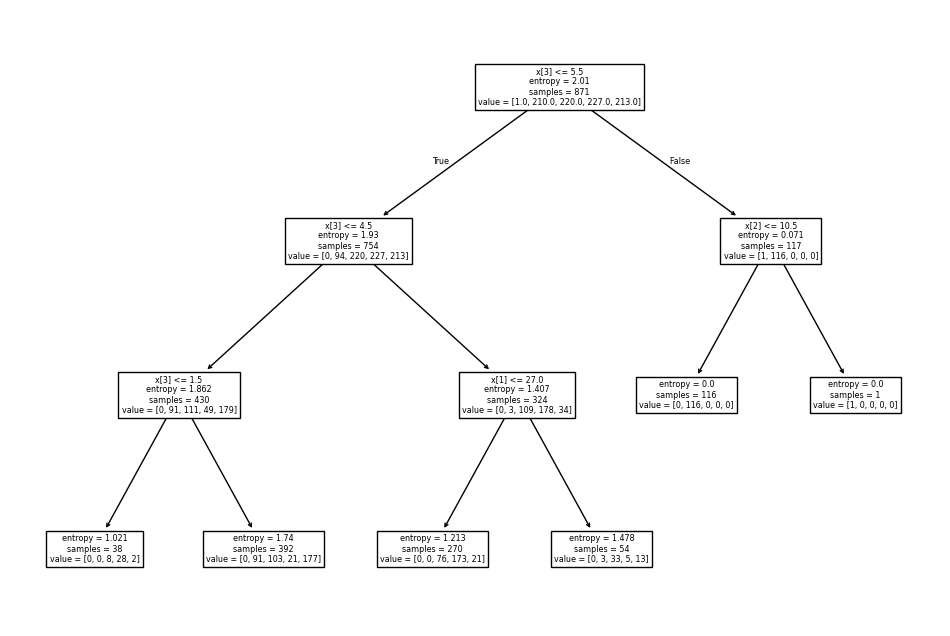

In [94]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

Visualize decision-trees with graphviz

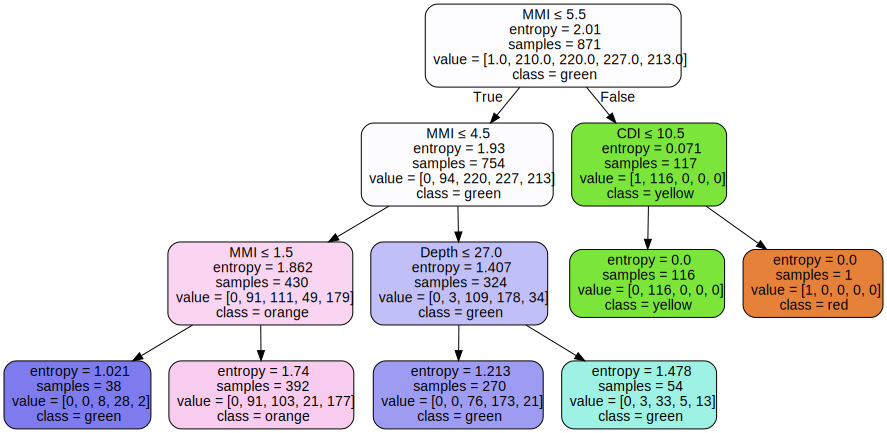

In [95]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

**8. CONFUSION MATRIX**

Four types of outcomes are possible while evaluating a classification model performance


---



True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

In [96]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[51  2  5 57]
 [ 0 19 39 47]
 [ 0  4 84 10]
 [ 0  5  8 99]]


**9. CLASSIFICATION REPORT**

In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

       green       1.00      0.44      0.61       115
      orange       0.63      0.18      0.28       105
         red       0.62      0.86      0.72        98
      yellow       0.46      0.88      0.61       112

    accuracy                           0.59       430
   macro avg       0.68      0.59      0.56       430
weighted avg       0.68      0.59      0.56       430



**10. RESULT AND CONCLUSION**

In this project, I build a Decision-Tree Classifier model to predict the Risk_Level level. I build two models, one with **criterion gini index** and another one with **criterion entropy**.

In the model with **criterion gini index**, the training-set accuracy score is 0.6062 while the test-set accuracy is 0.5884. These two values are quite comparable, so there is no significant sign of overfitting.

Similarly, in the model with **criterion entropy**, the training-set accuracy score is 0.6062 while the test-set accuracy is 0.5884. We get the same values as in the case with criterion gini. So, there is no significant sign of overfitting.

In both cases, the training-set and test-set accuracy scores are same score.

The confusion matrix and classification report provide more detailed insights into the model's performance for each alert level


In [59]:
import pandas as pd
import warnings
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

warnings.filterwarnings('ignore')


def train_and_evaluate_models(csv_file):
    try:
        # 1. Load dataset
        df = pd.read_csv(csv_file)

        # 2. Rename kolom agar seragam
        rename_map = {
            'magnitude': 'Magnitude', 'depth': 'Depth', 'cdi': 'CDI',
            'mmi': 'MMI', 'sig': 'SIG', 'alert': 'Alert'
        }
        df.rename(columns=rename_map, inplace=True)

        # 3. Split fitur dan target
        X = df[['Magnitude', 'Depth', 'CDI', 'MMI', 'SIG']]
        y = df['Alert']
        feature_names = X.columns.tolist()

        # 4. Split train-test
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.33, random_state=42
        )

        print("--- Melatih Model Decision Tree ---")

        # === Model Gini ===
        start_gini = time.time()
        clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
        clf_gini.fit(X_train, y_train)
        y_pred_gini = clf_gini.predict(X_test)
        gini_time = time.time() - start_gini
        gini_acc = accuracy_score(y_test, y_pred_gini)

        # === Model Entropy ===
        start_entropy = time.time()
        clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
        clf_entropy.fit(X_train, y_train)
        y_pred_entropy = clf_entropy.predict(X_test)
        entropy_time = time.time() - start_entropy
        entropy_acc = accuracy_score(y_test, y_pred_entropy)
        precision = precision_score(y_test, y_pred_entropy, average='macro', zero_division=0)
        recall = recall_score(y_test, y_pred_entropy, average='macro', zero_division=0)

        # === Gabungkan metrik untuk tabel output ===
        metrics = {
            "accuracy": entropy_acc,
            "precision": precision,
            "recall": recall,
            "exec_time": entropy_time,
            "gini_accuracy": gini_acc,
            "entropy_accuracy": entropy_acc
        }

        return clf_entropy, feature_names, metrics

    except Exception as e:
        print(f"Terjadi error saat melatih model: {e}")
        return None, None, None


def tampilkan_panduan_input():
    print("\n=== Panduan Pengisian Parameter Gempa ===")
    print("1. Magnitude (3.0 – 9.5)")
    print("   → Semakin tinggi nilai magnitude, semakin besar energi yang dilepaskan.")
    print("2. Depth (0 – 700 km)")
    print("   → Semakin dangkal pusat gempa, semakin besar getaran di permukaan.")
    print("3. CDI (1 – 10)")
    print("   → Semakin tinggi nilai CDI (Community Determined Intensity), semakin banyak orang yang merasakan gempa.")
    print("4. MMI (1 – 12)")
    print("   → Semakin tinggi nilai MMI (Modified Mercalli Intensity), semakin besar kemungkinan kerusakan di permukaan.")
    print("5. SIG (-100 – 200)")
    print("   → Semakin tinggi nilai SIG (Significance), semakin luas dampak yang ditimbulkan oleh gempa.")
    print("=========================================\n")


def get_manual_input(features):
    tampilkan_panduan_input()
    user_data = []
    print("Masukkan nilai fitur sesuai panduan di atas (gunakan angka):\n")
    for feature in features:
        while True:
            try:
                value = float(input(f"   - {feature}: "))
                user_data.append(value)
                break
            except ValueError:
                print("Input tidak valid. Masukkan angka saja.")
    return user_data


def run_prediction_loop(model, feature_names, metrics):
    print("\n" + "="*65)
    print("=== KALKULATOR PREDIKSI GEMPA (Decision Tree) ===")
    print("="*65)

    while True:
        # Input data fitur
        new_data = get_manual_input(feature_names)
        prediction = model.predict([new_data])[0]

        print("\n----------------------------")
        print(f"Hasil Prediksi : {prediction.upper()}")
        print("----------------------------")

        # Tampilkan tabel metrik model
        print("\n" + "="*65)
        print("Performa ini didasarkan pada pengujian model terhadap data CSV asli.")
        print("| Algoritma       | Akurasi (%) | Precision | Recall  | Waktu Eksekusi (S) |")
        print("|-----------------|-------------|-----------|---------|--------------------|")
        print(f"| Decision Tree   | {metrics['accuracy']*100:11.2f} | {metrics['precision']:9.4f} | {metrics['recall']:7.4f} | {metrics['exec_time']:18.6f} |")
        print("="*65)

        print(f"\nAccuracy classification Gini Index  : {metrics['gini_accuracy']*100:.2f}%")
        print(f"Accuracy classification Entropy     : {metrics['entropy_accuracy']*100:.2f}%")

        lanjut = input("\nIngin memasukkan data lagi? (y/n): ").strip().lower()
        if lanjut != 'y':
            break


# === MAIN ===
if __name__ == "__main__":
    dataset_path = "/content/earthquake_alert_balanced_dataset.csv"  # untuk Google Colab
    model, features, metrics = train_and_evaluate_models(dataset_path)

    if model:
        run_prediction_loop(model, features, metrics)

--- Melatih Model Decision Tree ---

=== KALKULATOR PREDIKSI GEMPA (Decision Tree) ===

=== Panduan Pengisian Parameter Gempa ===
1. Magnitude (3.0 – 9.5)
   → Semakin tinggi nilai magnitude, semakin besar energi yang dilepaskan.
2. Depth (0 – 700 km)
   → Semakin dangkal pusat gempa, semakin besar getaran di permukaan.
3. CDI (1 – 10)
   → Semakin tinggi nilai CDI (Community Determined Intensity), semakin banyak orang yang merasakan gempa.
4. MMI (1 – 12)
   → Semakin tinggi nilai MMI (Modified Mercalli Intensity), semakin besar kemungkinan kerusakan di permukaan.
5. SIG (-100 – 200)
   → Semakin tinggi nilai SIG (Significance), semakin luas dampak yang ditimbulkan oleh gempa.

Masukkan nilai fitur sesuai panduan di atas (gunakan angka):

   - Magnitude: 7
   - Depth: 200
   - CDI: 5
   - MMI: 5
   - SIG: 200

----------------------------
Hasil Prediksi : GREEN
----------------------------

Performa ini didasarkan pada pengujian model terhadap data CSV asli.
| Algoritma       | Akuras